In [63]:
import pandas as pd
import numpy as np


In [179]:
data=pd.read_csv('processed_training_v3.csv',index_col=0)
data.sample(5)



,BusinessTransaction,CompanyCode,DocumentType,EntryTime,InvoiceAmount,InvoiceDate,InvoiceDesc,InvoiceItemDesc,PaymentDocumentNo,Period,...,VendorName,VendorCountry,EarlyLate,EntryDays,PostingDays,LongestDays,Huristic1,Huristic2,Huristic5,ActualDays
361817,3,2,4,21,759.10,69.166667,1,1,23097,11,...,1445,GB,OnTime,0,0,30,30,30,0,0
19145,3,3,4,17,15897.42,41.666667,1398,47547,3235,3,...,182,GB,Late,0,26,30,4,10,0,-6
354573,3,3,4,9,176.01,65.833333,1,1,8945,12,...,1089,GB,Late,0,129,30,-99,4,0,-103
46809,3,2,4,21,57.81,47.500000,1,1,309,9,...,332,GB,Early,0,0,30,30,5,0,25
317822,3,2,4,21,6.31,67.500000,1,1,20470,9,...,1899,GB,OnTime,0,0,30,30,30,0,0


In [161]:
# print(data.loc[0])
len(data.columns)
data.columns

# data['CompanyCode'].value_counts()
# data['EarlyLate'].value_counts()


Index(['BusinessTransaction', 'CompanyCode', 'DocumentType', 'EntryTime',
       'InvoiceAmount', 'InvoiceDate', 'InvoiceDesc', 'InvoiceItemDesc',
       'PaymentDocumentNo', 'Period', 'PO_FLag', 'PO_PurchasingDocumentNumber',
       'ReferenceDocumentNo', 'TransactionCode', 'TransactionCodeDesc',
       'UserName', 'VendorName', 'VendorCountry', 'EarlyLate', 'EntryDays',
       'PostingDays', 'LongestDays', 'Huristic1', 'Huristic2', 'Huristic5',
       'ActualDays'],
      dtype='object')

# EDA

In [162]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


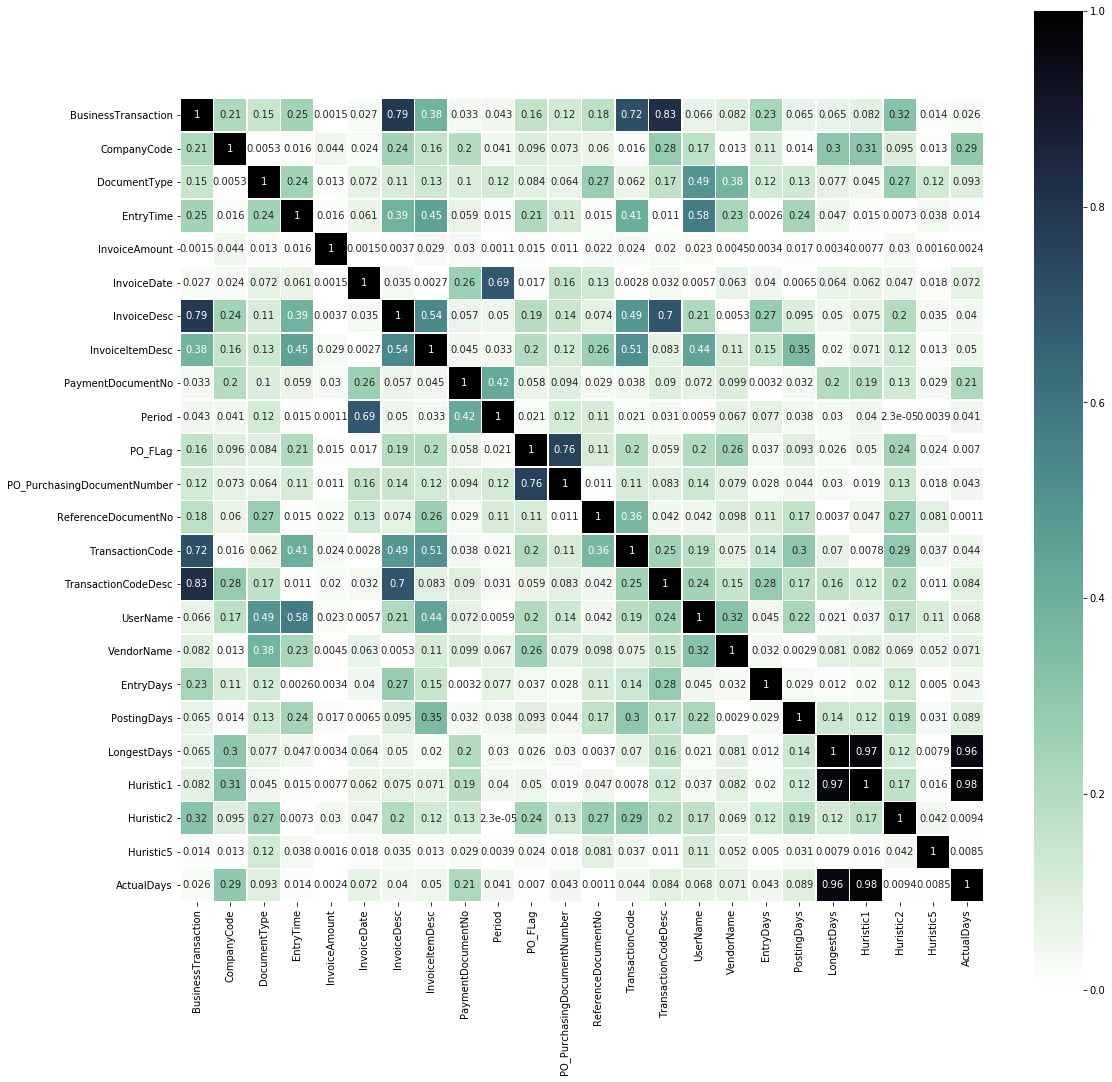

In [163]:
'''
heatmap
'''
cor=abs(data.corr())
# print(cor)
plt.figure(figsize=(18,18))
cmap = sns.cubehelix_palette(rot=-.4,dark=0, light=1, as_cmap=True)   #rot=-.4 蓝色系
ax = sns.heatmap(cor,linewidths=.5,square=True,annot=True,cmap=cmap)


In [164]:
# data=data.drop(['ActualDays'],axis=1)
value=data.columns.values


In [69]:
# ax=sns.countplot(x='CompanyCode',hue='EarlyLate',data=data)
# ax=sns.countplot(x='PaymentDocumentNo',hue='EarlyLate',data=data)    

    

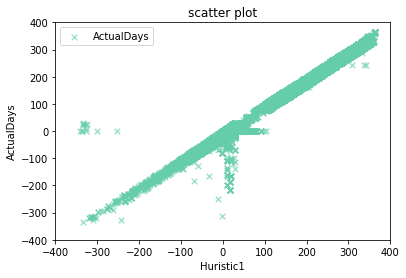

In [218]:
# plt.scatter(data['LongestDays'],data['ActualDays'],s=30,c='darkorange',marker='o',alpha=0.6,label='LongestDays')
plt.scatter(data['Huristic1'],data['ActualDays'],s=30,c='mediumaquamarine',marker='x',alpha=0.6)
plt.xlabel('Huristic1')
plt.ylabel('ActualDays')
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.title('scatter plot')
plt.legend(loc='best')


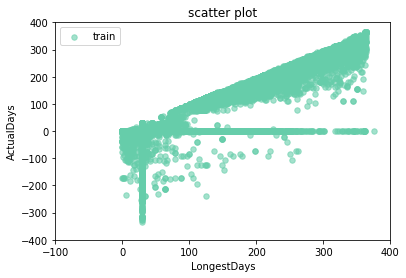

In [219]:
plt.scatter(data['LongestDays'],data['ActualDays'],s=30,c='mediumaquamarine',marker='o',alpha=0.6,label='train')
# plt.scatter(data['Huristic1'],data['ActualDays'],s=30,c='royalblue',marker='x',alpha=0.6,label='Huristic1')
plt.xlabel('LongestDays')
plt.ylabel('ActualDays')
plt.xlim(-100,400)
plt.ylim(-400,400)
plt.title('scatter plot')
plt.legend(loc='best')


Text(0.5, 1.0, 'scatter')

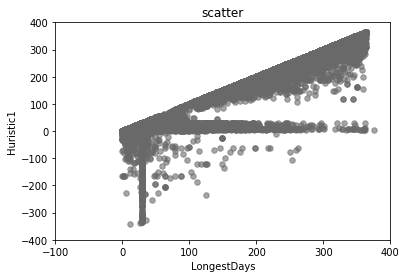

In [167]:
plt.scatter(data['LongestDays'],data['Huristic1'],s=30,c='dimgrey',marker='o',alpha=0.6)
plt.xlabel('LongestDays')
plt.ylabel('Huristic1')
plt.xlim(-100,400)
plt.ylim(-400,400)
plt.title('scatter')

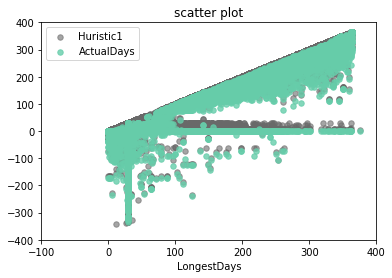

In [169]:
plt.scatter(data['LongestDays'],data['Huristic1'],s=30,c='dimgrey',marker='o',alpha=0.6,label='Huristic1')
plt.scatter(data['LongestDays'],data['ActualDays'],s=30,c='mediumaquamarine',marker='o',alpha=0.8,label='ActualDays')
plt.xlabel('LongestDays')
# plt.ylabel('Huristic1')
plt.xlim(-100,400)
plt.ylim(-400,400)
plt.title('scatter plot')
plt.legend(loc='best')


In [170]:
test=pd.read_csv('processed_testing.csv',index_col=0)



Text(0.5, 1.0, 'scatter plot')

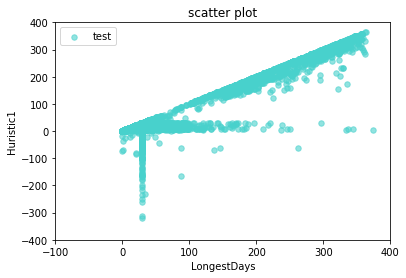

In [171]:
# plt.scatter(data['LongestDays'],data['Huristic1'],s=30,c='darkslategrey',marker='o',label='train')
plt.scatter(test['LongestDays'],test['Huristic1'],s=30,c='mediumturquoise',marker='o',alpha=0.6,label='test')
plt.xlabel('LongestDays')
plt.ylabel('Huristic1')
plt.xlim(-100,400)
plt.ylim(-400,400)
plt.legend(loc='best')
plt.title('scatter plot')


Text(0.5, 1.0, 'scatter plot')

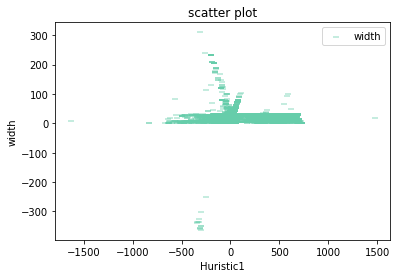

In [172]:
data['width']=data['Huristic1']-data['ActualDays']
plt.scatter(data['Huristic1']+data['ActualDays'],data['width'],s=30,c='mediumaquamarine',alpha=0.5,marker='_',label='width')
plt.xlabel('Huristic1')
plt.ylabel('width')
plt.legend(loc='best')
plt.title('scatter plot')
 

In [173]:
data['width'].value_counts()[:50]


30    91210
29    40880
28    39580
5     32917
3     25322
7     22242
14    14696
6      9387
4      6961
27     6706
8      6619
24     5595
23     5385
10     5160
22     5047
21     4938
9      4774
25     4465
15     4324
16     4027
26     3772
18     3695
11     3598
31     3526
17     3522
13     3482
20     3222
2      2923
12     2752
0      1845
19     1731
1      1263
35      524
42      413
39      403
37      352
36      311
34      297
33      161
41      152
44       93
38       84
46       74
40       71
32       59
50       59
43       41
75       11
48       10
81       10
Name: width, dtype: int64

In [174]:
neg=data[(data['Huristic1']>0) & (data['ActualDays']<-32)]
len(neg)


101

In [175]:
pos=data[(data['Huristic1']>=32) & (data['ActualDays']==0)]
len(pos)


3107

In [176]:
outlier=data[(data['Huristic1']<-300)&(data['ActualDays']>-50)]
len(outlier)
print(outlier['Huristic1'])



14985    -337
105205   -326
109188   -341
122199   -335
179553   -328
195855   -301
236262   -325
252855   -332
280593   -327
281531   -334
348708   -336
359289   -334
Name: Huristic1, dtype: int64


Text(0.5, 1.0, 'scatter plot')

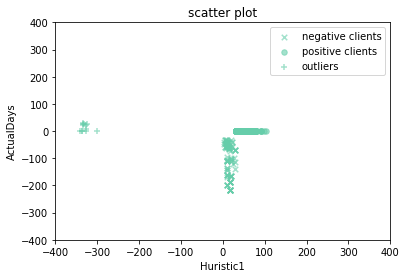

In [177]:
plt.scatter(neg['Huristic1'],neg['ActualDays'],s=30,c='mediumaquamarine',marker='x',alpha=0.6,label='negative clients')
plt.scatter(pos['Huristic1'],pos['ActualDays'],s=30,c='mediumaquamarine',marker='o',alpha=0.6,label='positive clients')
plt.scatter(outlier['Huristic1'],outlier['ActualDays'],s=30,c='mediumaquamarine',marker='+',alpha=0.6,label='outliers')
plt.xlabel('Huristic1')
plt.ylabel('ActualDays')
plt.xlim(-400,400)
plt.ylim(-400,400)
plt.legend(loc='best')
plt.title('scatter plot')



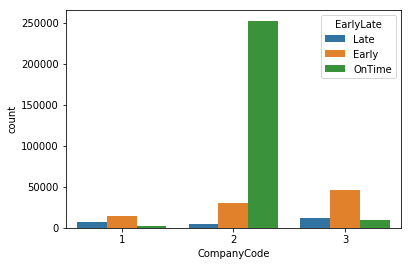

In [192]:

sns.countplot(hue='EarlyLate',x='CompanyCode',data=data)

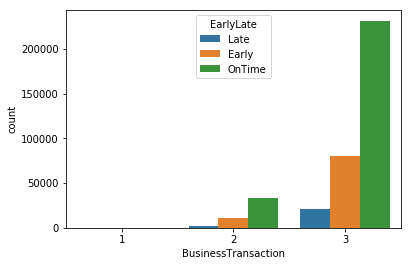

In [191]:
sns.countplot(hue='EarlyLate',x='BusinessTransaction',data=data)


https://seaborn.pydata.org/generated/seaborn.FacetGrid.html


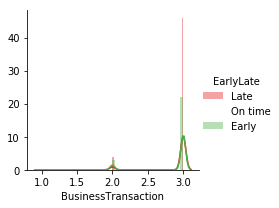

In [204]:
out

In [209]:
df=pd.DataFrame({'A':{0:'a',1:'b',2:'c'},'B':{0:1,1:3,2:5},'C':{0:2,1:4,2:6}})
df


,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [210]:
pd.melt(df,id_vars=['A'],value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [211]:
pd.melt(df,id_vars=['A'],value_vars=['B','C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


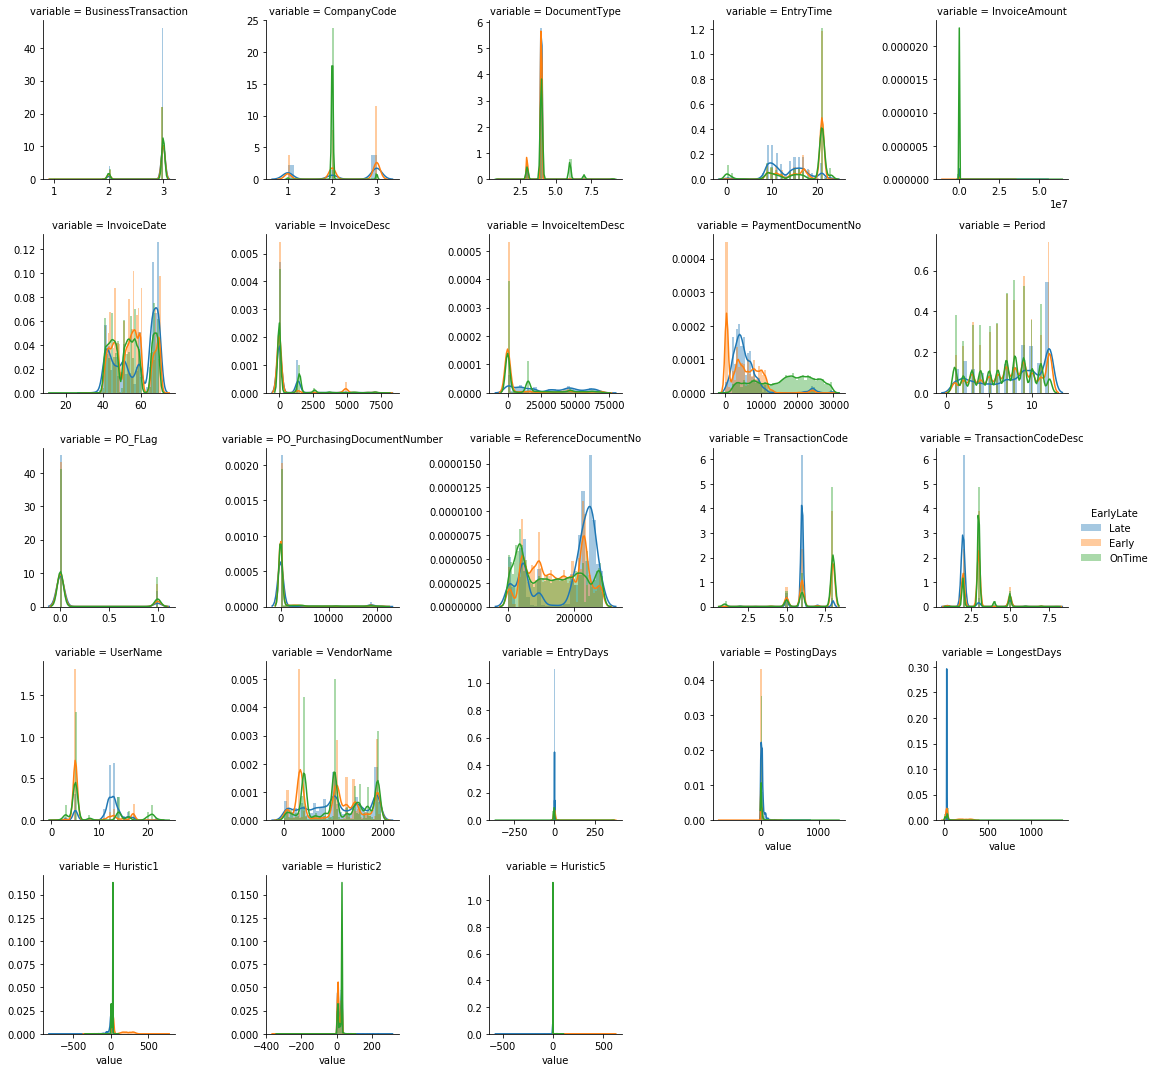

In [216]:
output = 'EarlyLate'
# Let's do a little EDA
cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
# cols.remove( "ID")
cols.remove('ActualDays')
f = pd.melt(data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()
